# Lecture 21: Short-term Hazard
## GEO 371T/391: Earthquakes
### Prof. Daniel Trugman, 2021

In [1]:
### Import General Python Packages

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

# Overview

In today's lecture, we focused on short-term earthquake hazards: methods and mitigation strategies aimed at time scales from seconds to weeks. On the shortest time scales, earthquake early warning systems can provide warning times of seconds to minutes that strong shaking is immeninent. Early warning systems do not forecast the occurence of earthquakes themselves, but instead aim to rapidly detect and characterize earthquakes in progress and relay that information to distant population centers. Over longer time scales, aftershock forecasting can provide a means to project the number of aftershocks in a given region following a large and damaging mainshock. This notebook provides conceptual examples overviewing both types of problems. Keep in mind that the practical implementation of these hazard mitigation systems is much more complicated than we can relay here.

## Example 1: Early Warning Exercise

This problem is adapted from the IS3 textbook (Problem 5.1) and walks through a simple early warning scenario with two coastal stations and an inland population center. The setup is as follows:

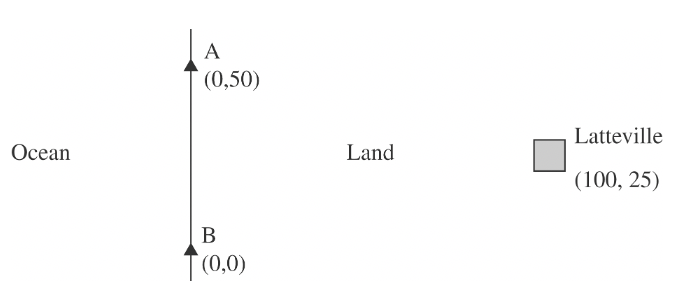

The two stations are located on the coast, 50km apart. Each station records P and S waves from the earthquake, with S minus P times at station A and B of 8s and 6s respectively. Here will will ignore the earthquake depth and assume crustal P and S wave velocities of 6.5 km/s and 3.6 km/s.

**Question 1(a)**

_To get started, we need to derive an equation for the distance $R$ from a station as a function of the observed S minus P time._

---

To do this, first note that we don't know the origint time $T_0$ of the event in question. The P and S arrival times are:

\begin{equation}
T_P = T_0 + R/c_p
\end{equation}

and 

\begin{equation}
T_S = T_0 + R/c_s.
\end{equation}

Using the S minus P time thus allows us to get rid of the unknown origin time:

\begin{equation}
T_S - T_P = R (1/c_s - 1/c_p)
\end{equation}

and solving for $R$ we have:

\begin{equation}
R = \frac{T_S - T_P}{1/c_s - 1/c_p}.
\end{equation}

Note for this problem, $1/c_s - 1/c_p$ = 1/3.6 - 1/6.5 = 0.124 s/km.

So in this case: $R = 8.069 \, (T_S - T_P)$.

**Question 1(b)** 

_Given the S minus P times of 8s and 6s from A and B, where is the event located?_

---

Well, we know $R_A = 8*8.069$ = 64.55 km and $R_B = 6*0.124$ = 48.42 km. By the symmetry of the problem, there must be two possible locations, one landwand and one seaward of stations along the coast line.

Since the origin is at station B, we have

\begin{equation}
x^2 + y^2 = 48.42^2
\end{equation}

and

\begin{equation}
x^2 + (y-50)^2 = 64.55^2.
\end{equation}

Subtracting the two equations, we can solve for y:

\begin{equation}
y^2 - 100y + 2500 - y^2 = 64.55^2 - 48.42^2,
\end{equation}

which gives $y = 6.77$. Then we can plug back in to the first equation and solve for x, returning $x = \pm 47.93$.

So the onshore location is: $(x,y)$ = (47.93, 6.77).

And the offshore location is $(x,y)$ = (-47.93, 6.77).

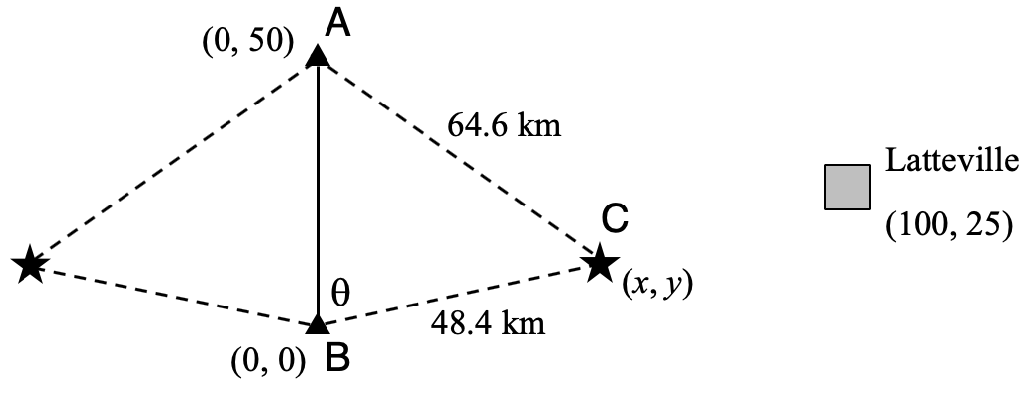

**Question 1(c)** 

_For each of the two locations, what is the S minus P time at Latteville?_

---

From our discussion above, we have $R = 8.069 \, (T_S - T_P)$. Now all we need to do is compute the two distances from (100, 25), which are:

\begin{equation}
R_E = \sqrt{(100-47.93)^2+(25-6.67)^2} = 55.2km
\end{equation}

and 

\begin{equation}
R_W = \sqrt{(100+47.93)^2+(25-6.67)^2} = 149.0km
\end{equation}

for the East (onshore) and West (offshore) locations.

Plugging these values in, we have S minus P times of 6.8s and 18.5s.

**Question 1(d)** 

_The strongest ground shaking usually results from S waves. Assuming the offshore location is correct, how much advance warning could be conveyed to Latteville before the S wave arrives at Latteville? Assume that the warning is possible as soon as the S wave has arrived at both stations._

---

The S-waves arrive at station A later than at station B (it has a larger S minus P time after all). Thus, if we wait for two stations to trigger before issuing our alert, we need to wait for the S-wave to hit A.

The distance from the offshore earthquake to A is:

\begin{equation}
R = \sqrt{(0-47.93)^2+(50-6.67)^2} = 64.5km
\end{equation}

and hence the S-wave arrives at 64.5/3.6 = 17.9s after origin. From question (c), the distance from the offshore origin to Latteville is 149.0km, so the S-wave arrives 149.0/3.6 = 41.4s after origin.

Thus the maximum warning time is 41.4s - 17.9s = 23.5s.
        

**Question 1(e)** 

_How much warning time is possible if the onshore location is correct, rather than the offshore location?_

---

The distance from the origin to station A is the same in both cases (64.5km), as is the S-wave arrival time (17.9s after origin).

From question (c), the distance from the onshore origin to Latteville is 55.2km, and hence the S-wave arrival time is 55.2km/3.6 = 15.3s after origin.

This is faster than the travel time to A, so we are in the _blind zone_ where no alert is possible.

**Question 1(f)** 

_How much pre-S-wave warning could be provided to Latteville if location and origin time were known instantly (e.g., from a dense onshore network of seismometers)?_

---

If there were a dense network of seismometers, we could in principle issue an alert instantaneously after the origin time. Thus, we would get an alert time equal to the S-wave travel time of 41.4s and 15.3s for the onshore and offshore locations, respectively.

**Question 1(g)** 

_Group discussion: This is obviously a highly simplified example that illustrates some fundamental concepts and challenges with early warning. For a "real-world" EEW problem, what issues would arise that we have neglected here?_

In [2]:
# [Enter group discussion notes here]

## Example 2: Aftershock Forecasting

Following a large earthquake, further damage can be mitigated through the use of _aftershock forecasts_ that project the rate of aftershock occurrence in the days and weeks following a large event. There are a number of ways of going about doing this, but one widely used framework was developed by Reasenberg and Jones (1989). In this model, the rate of aftershocks with magnitude at or above some $M_{min}$ following a mainshock of magnitude $M_{main}$ is:

\begin{equation}
\lambda(t) = 10^{a+b(M_{main} - M_{min})} (t + c)^{-p},
\end{equation}

where ${a, b, c, p}$ are empirical constants. Often, $b$ is associated with the Gutenberg-Richter b-value, which has a nice "self-similarity" property whereby he
total number of aftershocks triggered by all mainshocks
within a given mainshock magnitude unit is a constant. 

---

**Aftershock Productivity**

One takeaway from this formulation is that the peak rate of aftershock occurrence occurs shortly after the mainshock, and scales as $10^{a+bM_{main}}$. This part of the formula is called the "aftershock" productivity, and dictates the total number of aftershocks. There are two parts to this relation, a magnitude-dependent term $10^{b M_{main}}$ and a magnitude-independent term $10^a$. 

The magnitude-dependent term makes conceptual sense, in that we'd anticipate larger earthquakes to trigger more aftershocks. [Empirically, we observe that this triggering potential is more or less self-similar, hence the b-value.] 

The magnitude-independent term $10^a$ can be treated as a normalizing constant to make the numbers add up, and is fit by comparison with data. However, it is important to realize that the $a$ parameter may in principle vary widely from region to region or even sequence to sequence. Accounting for this variability 

---

**Time Dependence**

The second half of this formula dictates the time-dependence of the aftershock rate decay. Astute readers may associate this term, $\sim (t+c)^{-p}$, with Omori's law, and indeed that is the basis for the relation. The value $p$ controls the temporal decay, with higher values indicating a faster falloff. In the classic Omori's law, $p=1$. The parameter $c$ is a bit harder to wrap your head around. Physically, it could indicate a slight delay between the mainshock occurrence time and the peak aftershock rate, perhaps controlled by some time-dependent triggering process (nucleation?). Before getting to excited, however, the reality is that aftershock catalogs are highly incomplete in the aftermath of a mainshock, as seismic networks are overwhelmed. Thus the parameter $c$ is something of an offset needed to match the data.

---

**Example: RJ89 Parameters**

The original Reasenberg and Jones 1989 study (hereafter RJ89) fit the equation to data from aftershock sequences in California, finding median parameter
values of $a = −1.67$, $b = 0.91$, $p = 1.08$, and $c = 0.05$ days, which they termed the “generic” California parameters. These parameter values were widely used to forecast aftershocks in California for many years thereafter. The forecasting function looks something like:

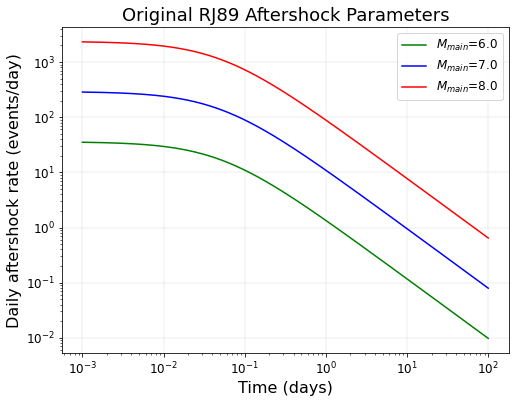

In [3]:
### Plot Aftershock Forecast

# set RJ parameters
a = -1.67
b = 0.91
p = 1.08
c = 0.05
Mmin = 4.0
Mmain = 6.0

# times to plot, days
tt = np.logspace(-3,2,501)

# figure setup
fig, ax = plt.subplots(figsize=(8,6))

# plot results
colors = ["g","b","r"]
Mmains = [6.0, 7.0, 8.0]
for MM, cc in zip(Mmains, colors):
    arate = 10**(a+b*(MM-Mmin)) * (tt+c)**(-p)
    ax.loglog(tt,arate,color=cc,
              label="$M_{main}$="+"{:.1f}".format(MM))
    
# format plot
ax.tick_params(labelsize=12)
ax.set_xlabel(
    "Time (days)",fontsize = 16)
ax.set_ylabel(
    "Daily aftershock rate (events/day)",fontsize=16)
ax.grid(lw=0.2)
ax.legend(loc="upper right",fontsize=12)
ax.set_title(
    "Original RJ89 Aftershock Parameters",fontsize=18)

# show results
plt.show()
plt.close()

---

The self-similarity of these curves is made clear by their identical shapes, up to a constant offset.

**Question:** From the plot, about how many aftershocks would we expect in the first hour after a M6 mainshock? 

**Question:** How would we get an "exact" answer from the RJ89 formula?

**Question:** How would the answers change if we adjusted the mainshock magnitude?


---

Reasenberg and Jones (1989) should be commended for how well their basic framework has stood the test of time. However, they made a slight miscalculation (intentional or not) in their originally published results. The issue stems from the fact that to derive their parameter values, they only fit the model to sequences with a sufficient sample size of data. In so doing however, they imparted a _selection bias_ by considering only the more productive sequences in their sample. This caused the original $a$ value to be overestimated, when compared to data collected later on.

To deal with this, some authors and users simply bumped the $a$ value from its original -1.67 to a new, lower value of -1.85 (Michael, 2012). How does this compare?



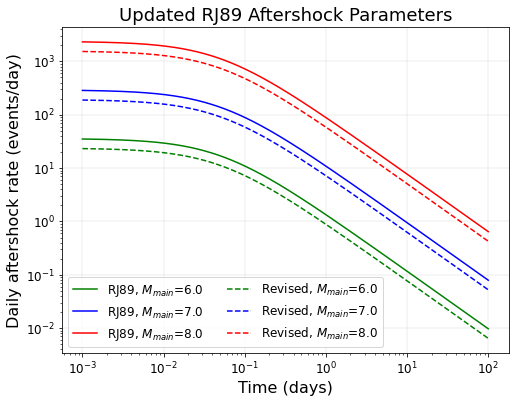

In [4]:
### Plot Aftershock Forecast

# set RJ parameters
a0 = -1.67
a1 = -1.85 
b = 0.91
p = 1.08
c = 0.05
Mmin = 4.0
Mmain = 6.0

# times to plot, days
tt = np.logspace(-3,2,501)

# figure setup
fig, ax = plt.subplots(figsize=(8,6))

# plot results: original 
colors = ["g","b","r"]
Mmains = [6.0, 7.0, 8.0]
for MM, cc in zip(Mmains, colors):
    arate = 10**(a0+b*(MM-Mmin)) * (tt+c)**(-p)
    ax.loglog(tt,arate, '-', color=cc,
              label="RJ89, $M_{main}$="+"{:.1f}".format(MM))
# plot results: new
colors = ["g","b","r"]
Mmains = [6.0, 7.0, 8.0]
for MM, cc in zip(Mmains, colors):
    arate = 10**(a1+b*(MM-Mmin)) * (tt+c)**(-p)
    ax.loglog(tt,arate, "--", color=cc, 
              label="Revised, $M_{main}$="+"{:.1f}".format(MM))  

# format plot
ax.tick_params(labelsize=12)
ax.set_xlabel(
    "Time (days)",fontsize = 16)
ax.set_ylabel(
    "Daily aftershock rate (events/day)",fontsize=16)
ax.grid(lw=0.2)
ax.legend(loc="lower left",fontsize=12,ncol=2)
ax.set_title(
    "Updated RJ89 Aftershock Parameters",fontsize=18)

# show results
plt.show()
plt.close()

---

This is just a simple shift downward, but it makes a big difference in log space!

In recent years, the USGS has been actively working to improve this formula by (e.g. Page et al., 2016; Hardebeck et al., 2018):

* estimating region-specific parameters
* better accounting for time-dependence in the magnitude of completeness of the catalog
* accounting for sequence-specific variations in aftershock productivity

One interesting result, at least to me, is that there can be significant differences in aftershock productivity in different regions. Consider the case of California (Hardebeck et al., 2018), split into Southern California, Northern California, Mendocino, and Hydrothermal regions:


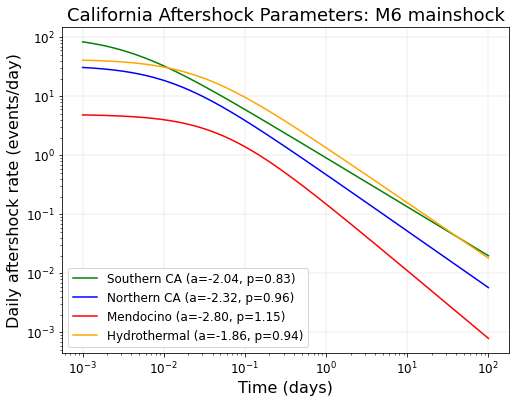

In [5]:
### Plot Aftershock Forecasts

# set parameters
rstrings = ["Southern CA (a=-2.04, p=0.83)",
           "Northern CA (a=-2.32, p=0.96)",
           "Mendocino (a=-2.80, p=1.15)",
           "Hydrothermal (a=-1.86, p=0.94)"]
avals = [-2.04,-2.32,-2.80,-1.86]
pvals = [0.83,0.96,1.15,0.94]
cvals = [0.0033, 0.012, 0.05, 0.026]
b = 1.0 # now fixed to 1
Mmin, MM = 4.0, 6.0 # fixed here

# figure setup
fig, ax = plt.subplots(figsize=(8,6))

# plot results: original 
colors = ["g","b","r","orange"]
for ii in range(4):
    
    arate = 10**(avals[ii]+b*(MM-Mmin)) * (
        tt+cvals[ii])**(-pvals[ii])
    ax.loglog(tt,arate, '-', color=colors[ii],
              label=rstrings[ii])
    
# format plot
ax.tick_params(labelsize=12)
ax.set_xlabel(
    "Time (days)",fontsize = 16)
ax.set_ylabel(
    "Daily aftershock rate (events/day)",fontsize=16)
ax.grid(lw=0.2)
ax.legend(loc="lower left",fontsize=12,ncol=1)
ax.set_title(
    "California Aftershock Parameters: M6 mainshock",
    fontsize=18)

# show results
plt.show()
plt.close()

**Conceptual Questions**

1. Which region has more productive aftershock sequences: Northern or Southern CA?
2. What effect does changing the $p$ value have?
3. What effect does chaning the $c$ value have?

In [6]:
#[insert group answers here]

**Challenge Questions**

1. What factors might drive differences in aftershock productivity?
2. How might we account for uncertainty in our forecast?
3. How might we try to address sequence-specific variations in aftershock productivity?

In [7]:
#[insert group answers here]